# The Mysterious Realm of Lenia (jxkc2)


In [1]:
#Libraries to be imported in this report

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


### Content Outline
1. [Unveiling the Lenia Model](#Unveiling-the-Lenia-Model)
2. [Basic Principles of Cellular Automata](#Basic-Principles-of-Cellular-Automata)
3. [The Classics of Cellular Automata](#The-Classics-of-Cellular-Automata)
4. [Bridging into Lenia from the Classics](#Bridging-into-Lenia-from-the-Classics)
5. [Discovering other Variations of Lenia](#Discovering-other-Variations-of-Lenia)

## Unveiling the Lenia Model

<img src="https://miro.medium.com/v2/resize:fit:1280/1*CwTP7ARiYE_BvsWOQzCkLA.gif" width="384" height="150" />

*Fig.1: Computer Simulation of Artificial Life in a 2D Grid*

A beautiful display of patterns, is it not? The above figure (or lenia) is a simulation describing the amazing yet complex changes in artificial patterns used to mimick the seemingly random changes in the states of living cells, which is in fact governed by a specific set of systematic rules. This is a characteristic of a discrete computational model called Cellular Automata, a complex system of several simple agents working together and exhibiting complex intelligent behaviour. 

In fact, the behaviour of lenia exhibited in Fig. 1 is an extension of the famous Conway's Way of Life; a continuous generalisation of the famous model. However, before ambitiously diving into the exploration of the lenia model and beyond in this report, we will start from leveraging the basic principles of the Cellular Automata model using simple classic examples and building this foundational framework up to study the lenia model, in addition to leaving some final room for applying our derived understanding of cellular automata models to other relevant applications of computational design in other fields.

## Basic Principles of Cellular Automata

In Cellular Automata (CA), we need 3 specific aspects.
1. Grid of Cells/Entities 
2. The State of the Cells
3. Rules governing changes in State of the Cells

In order to simulate a cellular automata model, a spatial grid of cells, be it, 1D, 2D or 3D needs to be defined. In this grid, every cell can be thought of as an entity with a known state. For simplicity, we can assume this state to be of a binary type where the cell can exist in either state 0 or state 1 (white or black, etc.). The last aspect requires a set of defined rules that can model how these cell states change over time. This is determined by analysing neighbouring states. For instance, in the next moment in time, the state of cell can be calculated based on the neighborhood of one state, be it through summing neighboring states, averaging them, etc. Mathematically, we can express this relationship as:

$(cell \ state)_{t} = f(neighborhood \ of \ states)_{t-1}$

for any moment in time, $t$ and $(t-1)$ being the previous generation of time.

In the next section, we will use the above basic computational thinking of CA models to examine the classic examples of Wolfram's elementary CA and Conway's Way of Life, breaking down the design set-up of the rules influencing the change of states over time. From which, we will transition into the set-up of lenia and take a creative leap into modifying and extending the current lenia model implementation in the subsequent sections.

## The Classics of Cellular Automata
### 1. Wolfram Elementary CA

Cellular Automata (CA) models have a rich history of work, dating back to John Von Neumann and Stanislaw Ulam. In this section however, we will instead start with a simple one-dimensional array of cells with state being either 0 or 1. The set-up of this is shown below with an arbitrary number of zeroes and a single 1 in the specified cell for simplicity.

<img src= https://i.postimg.cc/CKPp5Qq8/Computing-Project-Diagrams-page-1.png width="340" height="200">

*Fig.2: Schematic Diagram of How the Wolfram CA runs*

The circled portion above represents the neighborhood of the specified cell of state 1 which we choose to focus on at time generation, $t=0$. In the next generation, $t=1$, the same highlighted section of the cell potentially has a different combination depending on the set of rules we impose on the system.

If we were to permute the entire list of possible combinations of the how this neighborhood (The 3 cells above) can be configured, they are:

$000$, $001$, $010$, $100$, $011$, $110$, $101$, $111$.

From this given list, we have the autonomy to assign each of the 8 combinations an outcome say 1 or 0 which we call this a rule set in wolfram elementary CA as shown below. This outcome is targeting what the middle cell of the neighborhood of 3 cells should be based on the rule set. 

<img src= https://i.postimg.cc/RCpXWzhG/Computing-Project-Diagrams-page-2.png width="325" height="300">

*Fig.3: Schematic Diagram of the Rule Set and Determination of State of Selected cell*

Because of the binary nature of the outcome, we essentially have $2^8 = 256$ possible rule sets in Wolfram elementary CA which are organised into 4 categories: Uniformity, Repetition, Random and Complexity. The first 2 categories provide predictable results in future generrations of time, where uniformity imples the system tends to all cells having a constant state 1 or 0 with time. Repetition implies an ordered pattern for instance, $01010101$ or $110110110$ etc. In contrast, random as the name suggests, provides non-repeating results in future generations of time. However, complexity is subtly different where it is not entirely random nor repetitive in nature, which is of interest in the study of Lenia.


Now, with this knowledge in mind, we can easily simulate the elementary CA using NumPy library from Wolfram code.

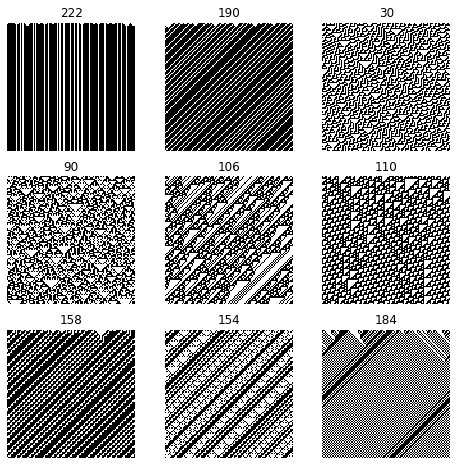

In [9]:
#Code is taken directly from website, this is not to be implemented on my own but for illustrative purposes
#of what the 4 categories, uniformity, repetition, randomness and complexity mean visually.
#However, changes can be made to the rule sets to show different results

u = np.array([[4], [2], [1]]) #Defines the vector to obtain numbers written in binary form

def step(x, rule_b):
    """Compute a single stet of an elementary cellular
    automaton."""
    # The columns contains the L, C, R values
    # of all cells.
    y = np.vstack((np.roll(x, 1), x,
                   np.roll(x, -1))).astype(np.int8)
    # We get the LCR pattern numbers between 0 and 7.
    z = np.sum(y * u, axis=0).astype(np.int8)
    # We get the patterns given by the rule.
    return rule_b[7 - z]

def generate(rule, size=100, steps=100):
    """Simulate an elementary cellular automaton given
    its rule (number between 0 and 255)."""
    # Compute the binary representation of the rule.
    rule_b = np.array(
        [int(_) for _ in np.binary_repr(rule, 8)],
        dtype=np.int8)
    x = np.zeros((steps, size), dtype=np.int8)
    # Random initial state.
    x[0, :] = np.random.rand(size) < .5
    # Apply the step function iteratively.
    for i in range(steps - 1):
        x[i + 1, :] = step(x[i, :], rule_b)
    return x

fig, axes = plt.subplots(3, 3, figsize=(8, 8))
rules = [222, 190, 30,
         90, 106, 110,
         158, 154, 184] #Rule sets can be changed here. See Wolfram Elementary CA for Rule numbers to see
#which particular 2D result
for ax, rule in zip(axes.flat, rules):
    x = generate(rule)
    ax.imshow(x, interpolation='none',
              cmap=plt.cm.binary)
    ax.set_axis_off()
    ax.set_title(str(rule))



It is important to note that as we are analysing the above results of Wolfram elementary CA, observe that it is a 2D figure. This result is presented in this way because it essentially involves our original one dimensional array of cells stacked on changing generations of time from $t=0$ onwards and hence the 2D format. In other words, the $y$-axis is time while the $x$-axis represents the 1D array of cells of a given state.

In this case shown above, Rule 222 has essentially some cells having state 0 or 1 throughout as time passes, representing uniformity while rule 190 displays repetition of cells periodically changing from black to white down the vertical and vice-versa. In rule 30, it displays non-repeating or random patterns from a surpisingly simple rule and finally in rule 110, it represents the idea of complexity where it is more than just a simple sum of its parts, simple elements interacting locally with simple rules to give an ordered yet unpredictable pattern. Next, we shall extend this property of complexity to a 2D grid space.

### 2. Conway's Game of Life

